In [1]:
import pandas as pd
import geopandas as gpd
from plotnine import *

In [2]:
# Italian regions - ISTAT
geo_reg = gpd.read_file(r"..\Data\Reg01012022_g_WGS84.shp")

In [3]:
# Unemployement rate / 15-64 / 2021
unempl_reg = pd.read_csv(r"..\Data\Reg_tasso_disoccupazione_2021.csv", sep=",")

In [4]:
unempl_reg.head(5)

,COD_REG,Q1,Q2,Q3,Q4
0,1,8.5,7.7,6.8,7.0
1,2,10.3,7.0,6.1,5.9
2,3,6.9,6.1,5.5,5.4
3,4,6.0,4.7,3.7,3.1
4,5,5.8,4.9,5.4,5.4


In [5]:
# Unpivot the DataFrame to long format
unempl_reg_melt = pd.melt(unempl_reg, id_vars=['COD_REG'], 
                          value_vars=['Q1',
                                      'Q2',
                                      'Q3',
                                      'Q4'])

In [6]:
unempl_reg_melt.head()

,COD_REG,variable,value
0,1,Q1,8.5
1,2,Q1,10.3
2,3,Q1,6.9
3,4,Q1,6.0
4,5,Q1,5.8


In [7]:
# Join geo_reg - unempl_reg_melt, field=COD_REG
geo_reg_unempl = geo_reg.merge(unempl_reg_melt, on="COD_REG")

c:\Python37\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
c:\Python37\lib\site-packages\descartes\patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.


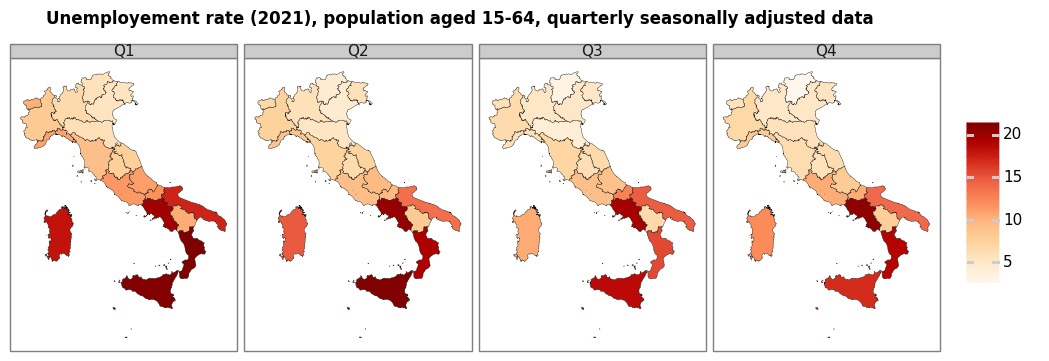

In [9]:
# Plot the map
fig, map_plot = (ggplot(data=geo_reg_unempl, mapping=aes(fill="value"))
 + geom_map(size=0.15)
 + coord_fixed()
 + scale_fill_cmap(cmap_name="OrRd") 
 + ggtitle("Unemployement rate (2021), population aged 15-64, quarterly seasonally adjusted data")
 + theme_bw()
 + theme(figure_size=(12,6),
         legend_title=element_blank(), 
         panel_grid_major=element_blank(), 
         panel_grid_minor=element_blank(),
         axis_text_x=element_blank(), 
         axis_text_y=element_blank(), 
         axis_ticks_major_x=element_blank(), 
         axis_ticks_major_y=element_blank(), 
         plot_title=element_text(size=12, face="bold"), 
         text=element_text(size=11))
 + facet_grid("~variable")
).draw(show=True, return_ggplot=True)

In [10]:
# Save the map as jpg
fig.savefig("test_map.jpg",
            bbox_inches="tight", 
            dpi=300)